# importing packages

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

# loading dataset from sagemaker jupyter folder 

In [33]:
inst=pd.read_csv('datasets/carInsurance_train.csv')
inst.head()


,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [3]:
inst.tail()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
3995,3996,28,technician,single,tertiary,0,0,1,0,cellular,25,may,1,40,2,failure,17:46:28,17:50:57,1
3996,3997,49,admin.,divorced,secondary,0,124,1,1,cellular,29,jul,19,-1,0,NaN,14:49:16,14:51:21,0
3997,3998,27,admin.,single,secondary,0,-400,0,1,cellular,8,jul,1,-1,0,NaN,12:19:03,12:23:53,0
3998,3999,36,entrepreneur,single,tertiary,0,658,1,0,cellular,29,jan,1,227,3,failure,11:27:35,11:29:14,0
3999,4000,45,services,married,primary,0,137,1,0,NaN,9,may,2,-1,0,NaN,13:31:48,13:36:22,0


# task 3 Data Analysis 

In [4]:
# checking Unique keywords ineach column 
{col:inst[col].nunique() for col in inst.columns}

{'Id': 4000,
 'Age': 70,
 'Job': 11,
 'Marital': 3,
 'Education': 3,
 'Default': 2,
 'Balance': 2178,
 'HHInsurance': 2,
 'CarLoan': 2,
 'Communication': 2,
 'LastContactDay': 31,
 'LastContactMonth': 12,
 'NoOfContacts': 35,
 'DaysPassed': 330,
 'PrevAttempts': 20,
 'Outcome': 3,
 'CallStart': 3777,
 'CallEnd': 3764,
 'CarInsurance': 2}

# Checking visualization view for nan values in each column 

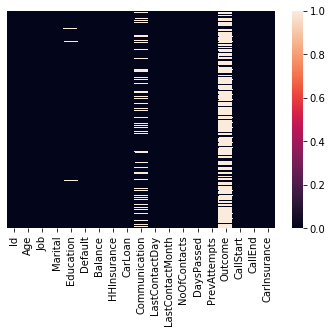

In [5]:
# visulizing nan values in each column 
sns.heatmap(inst.isnull(),yticklabels=False) # checking null values in each column 

# checking no. of nan values in each column 

In [6]:
# checking number of Nan Values in each column 
inst.isna().sum()

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

# handling with  nan values 

In [34]:
inst.drop(columns=['Outcome'],inplace=True) # droping outcome column having maximum null values 

In [35]:
# filling nan values 
inst.Education.fillna(random.choice([i for i in set(inst.Education) if i is not np.nan]) ,inplace=True)
inst.Job.fillna(random.choice([i for i in set(inst.Job) if i is not np.nan]) ,inplace=True)

# preprocessing 

In [36]:

# Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [37]:
# encoding Keywords
inst.Job,inst.Marital,inst.Education,inst.LastContactMonth=[le.fit_transform(inst[col]) for col in ['Job','Marital','Education','LastContactMonth']]

In [11]:
inst.info() # tell us no. of samples and each columns type with total memory took by it 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               4000 non-null   int64 
 3   Marital           4000 non-null   int64 
 4   Education         4000 non-null   int64 
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   int64 
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  CallStart         4000 non-null   object
 16  CallEnd           4000 non-null   object
 17  CarInsurance  

In [12]:
inst.groupby(by='Marital').mean() # taking mean Based on Marital repersents average 

,Id,Age,Job,Education,Default,Balance,HHInsurance,CarLoan,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
Marital,,,,,,,,,,,,,,
0,1958.285714,46.898551,4.519669,1.157350,0.014493,1341.006211,0.494824,0.128364,16.236025,5.550725,2.432712,44.726708,0.695652,0.434783
1,1994.892361,44.171007,4.095920,1.150608,0.015625,1609.187934,0.502170,0.142361,15.703993,5.368056,2.753472,45.537326,0.661024,0.361545
2,2027.960429,33.336356,4.994229,1.384996,0.012366,1464.529266,0.474031,0.117065,15.549052,5.638087,2.399011,56.310800,0.833471,0.462490


In [13]:
inst.Age.unique() # unique ages for loan 

array([32, 29, 25, 30, 37, 35, 27, 53, 44, 38, 61, 34, 46, 49, 50, 57, 80,
       31, 63, 60, 54, 45, 42, 36, 39, 33, 41, 40, 79, 47, 78, 52, 18, 28,
       58, 23, 55, 56, 43, 48, 19, 62, 64, 24, 73, 26, 51, 59, 66, 20, 77,
       71, 69, 72, 68, 65, 22, 67, 70, 75, 21, 87, 83, 82, 84, 81, 76, 92,
       86, 95])

In [14]:
# inst.Education.apply(lambda x:0 if x==0 else 1) # if else condition with lambda function

In [15]:
inst.describe()  # std(Standard Deviation) repersents deviation from mean 

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,4.41950,1.182500,1.222500,0.014500,1532.937250,0.49275,0.133000,15.721250,5.472000,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,3.20735,0.625133,0.673504,0.119555,3511.452489,0.50001,0.339617,8.425307,3.132279,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.00000,0.000000,0.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,1.00000,1.000000,1.000000,0.000000,111.000000,0.00000,0.000000,8.000000,3.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,4.00000,1.000000,1.000000,0.000000,551.500000,0.00000,0.000000,16.000000,6.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,7.00000,2.000000,2.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,8.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,10.00000,2.000000,2.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,11.000000,43.000000,854.000000,58.000000,1.000000


# Task 4  Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f999f0061d0>,
      dtype=object)

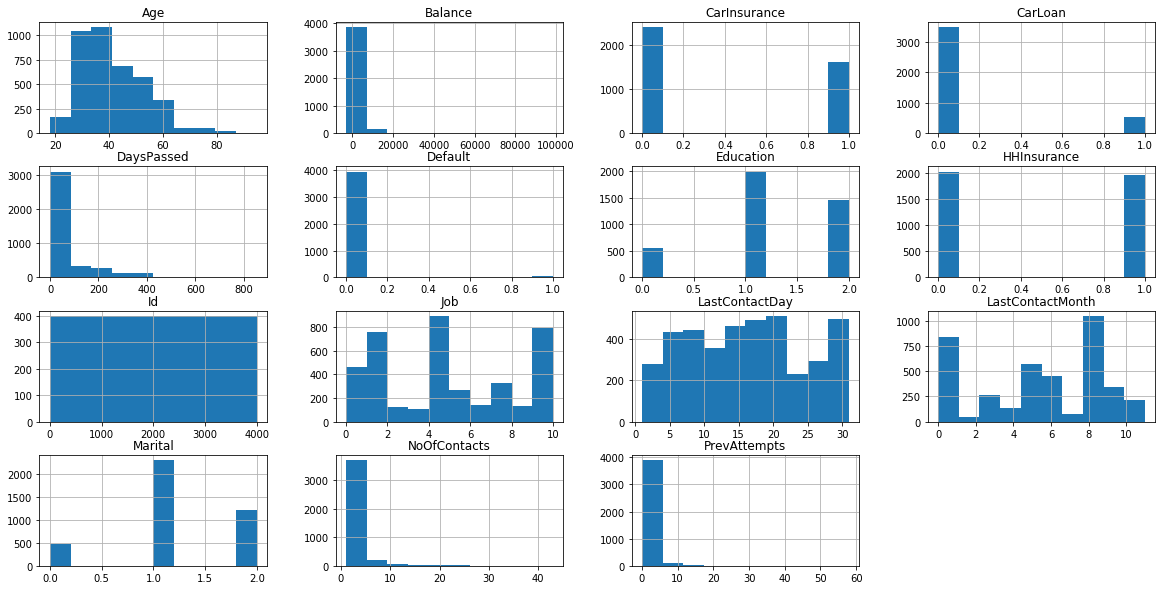

In [16]:
# checking which keyword in each column has maximum or minimum  frequency 
inst[inst.columns].hist(figsize=(20,10))

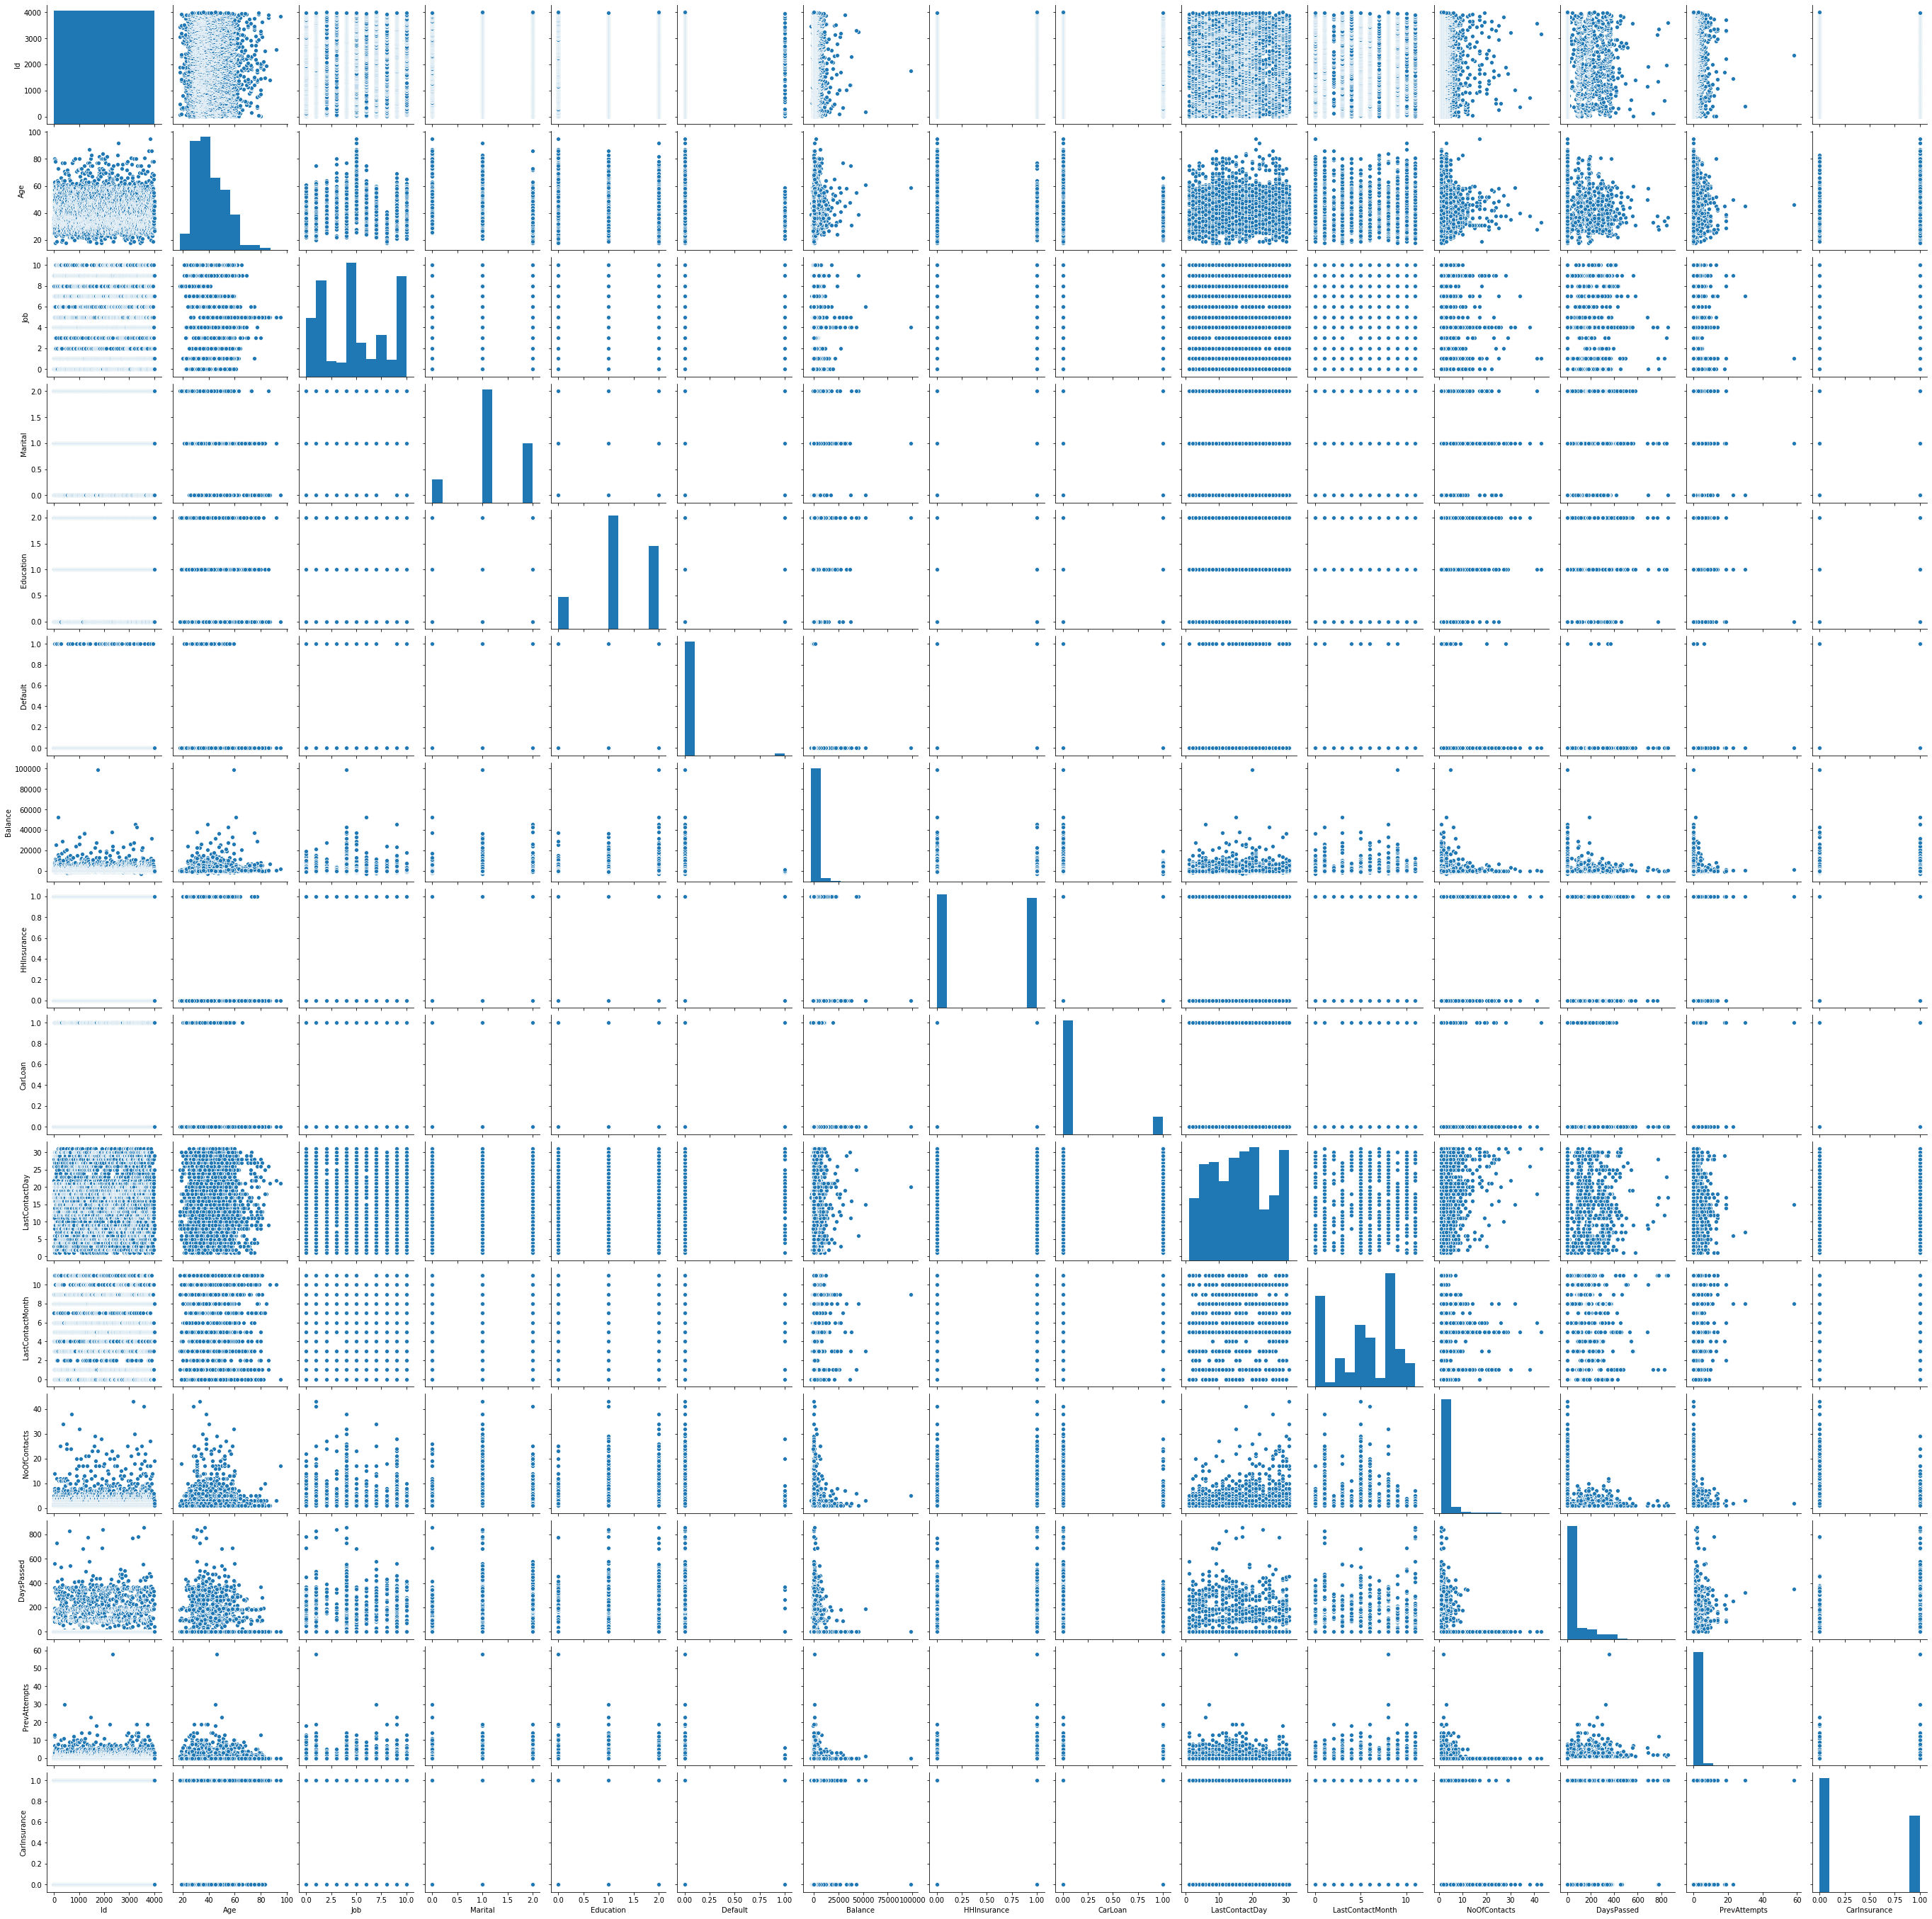

In [17]:
sns.pairplot(inst) # relationship graph b/w any two features 

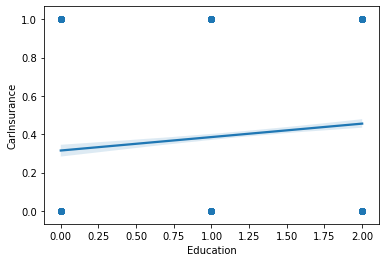

In [18]:
sns.regplot(inst.Education,inst.CarInsurance) # checking regression plot what are the features that are regressive 

# checking correlation graph with each column as pairplot in tabulated form and with values 

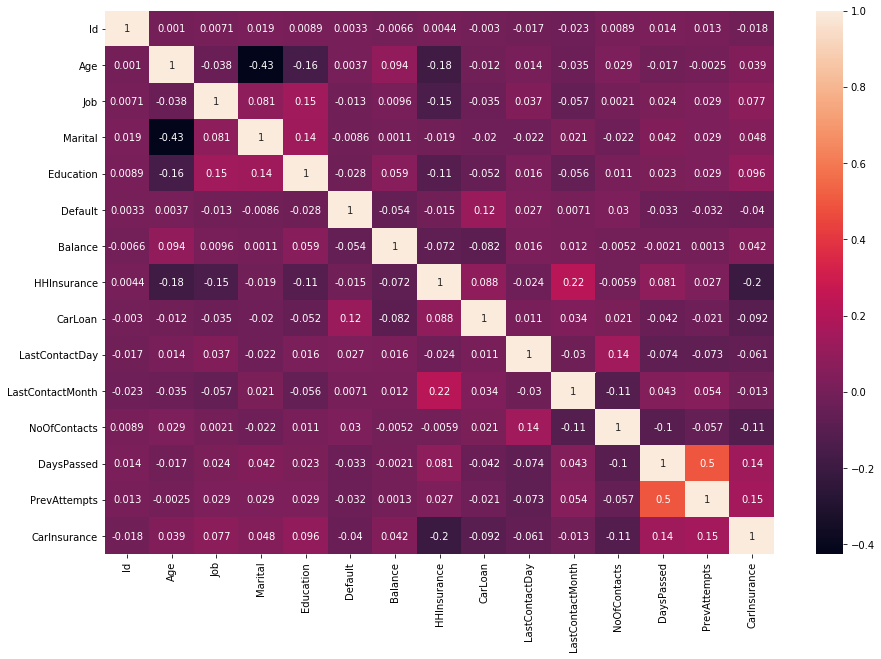

In [19]:
# correlation heatmap graph (Correlation repersents how more one feature depends on another feature)
plt.figure(figsize=(15,10))
sns.heatmap(inst.corr(),annot=True) # Education and job is correlated with positive 0.15 means education is more required for job 

In [38]:
inst.drop(columns=['Communication','CallStart','CallEnd'],inplace=True)

# Task 5 , Training and Testing dataset 

In [39]:
X=inst.iloc[:,1:-1]  # Feature and label 
Y=inst.iloc[:,-1]

In [40]:
X,X.shape

(      Age  Job  Marital  Education  Default  Balance  HHInsurance  CarLoan  \
 0      32    4        2          2        0     1218            1        0   
 1      32    1        1          0        0     1156            1        0   
 2      29    4        2          2        0      637            1        0   
 3      25    8        2          0        0      373            1        0   
 4      30    4        1          2        0     2694            0        0   
 ...   ...  ...      ...        ...      ...      ...          ...      ...   
 3995   28    9        2          2        0        0            1        0   
 3996   49    0        0          1        0      124            1        1   
 3997   27    0        2          1        0     -400            0        1   
 3998   36    2        2          2        0      658            1        0   
 3999   45    7        1          0        0      137            1        0   
 
       LastContactDay  LastContactMonth  NoOfConta

In [41]:
Y,Y.shape

(0       0
 1       0
 2       1
 3       1
 4       0
        ..
 3995    1
 3996    0
 3997    0
 3998    0
 3999    0
 Name: CarInsurance, Length: 4000, dtype: int64,
 (4000,))

# NOrmalization 

In [42]:
# convert values into float make faster in computation 
X=np.array(X).astype('float32')
Y=np.array(Y).astype('float32').reshape(-1,1)

In [43]:
# scale data 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc_x=StandardScaler()
X=sc_x.fit_transform(X) # scaling feature with fitting feature
sc_y=StandardScaler()
Y=sc_y.fit_transform(Y) # scale label with fitting label 

# splitting train test part 

In [44]:
# making train and test data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=20)

# fitting on local platform model 

In [45]:
# training logistic model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,r2_score,f1_score,mean_squared_error,mean_absolute_error
lr=LogisticRegression()
lr.fit(X_train,y_train)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
# prediction 
pred=lr.predict(X_test)

In [47]:
# score obtained on test  
lr.score(X_test,y_test)

0.65

# Loss functions 

In [48]:
MSE=mean_squared_error(y_test,pred)
RMSE=float(format(np.sqrt(MSE),'0.3f'))
n=len(X_test)
k=X_test.shape[1]
MAE=mean_absolute_error(y_test,pred)
r2=r2_score(y_test,pred)
adjusted_r2=1-(1-r2)*(n-1)/(n-k-1)
print('Mse:',MSE,'RMSE : ',RMSE,'MAE: ',MAE,'R2_score :',r2,'Adjusted_R2Score:',adjusted_r2,sep='\n')

Mse:
0.35
RMSE : 
0.592
MAE: 
0.35
R2_score :
-0.4482353025488688
Adjusted_R2Score:
-0.4721883037360639


# training model with sagemake 

In [49]:
X_train.shape,y_train.shape# vector is of 1d array


((3200, 13), (3200, 1))

In [50]:
y_train=y_train[:,0]
y_train.shape

(3200,)

# getiing permissions of sagemaker for execution 

In [51]:
import sagemaker
import boto3
sagemaker_session=boto3.Session()      #creating session for sagemaker 
bucket,prefix='sour','logistic_model' # prefix is a subfolder exist in a bucket(a storage/container for objects)
role=sagemaker.get_execution_role()   # get execution role to execute notebook 
print(role)

arn:aws:iam::229211906260:role/service-role/AmazonSageMaker-ExecutionRole-20200716T105138


# Creating sagemaker buffer for input data 

In [52]:
import io,os   # Deal with various type of input/output format 
import sagemaker.amazon.common as smac # simply used to convert our data into io_record format 

# This format required for Sagemaker LinearLearner algo 
buf=io.BytesIO()# create memory byte array 
smac.write_numpy_to_dense_tensor(buf,X_train,y_train)
buf.seek(0) # when write in_memory byte array it increment by 1 everytime 


0

# uploading input data to s3 bucket  

In [53]:
bucket='sour'  # bucket name
prefix='logistic_model' # subfolder
key='train_data'  # object name by which data will be stored in bucket 
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix,key)).upload_fileobj(buf) # uploading data(buf) code 
train_data_loc='s3://{}/{}/{}'.format(bucket,prefix,key)  # location where training data uploaded 
print('uploading training data location',train_data_loc)

uploading training data location s3://sour/logistic_model/train_data


# Declaration of ouput location for model output in bucket 

In [54]:
# location for output 
key='output'
out_loc='s3://{}/{}/{}'.format(bucket,prefix,key)

# Get container to execute sagemaker model 

In [55]:
# Get Training container to train the model of sagemaker built_in algorithms  
from sagemaker.amazon.amazon_estimator import get_image_uri
container = get_image_uri(boto3.Session().region_name, 'linear-learner')

'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


In [56]:
container

'991648021394.dkr.ecr.ap-south-1.amazonaws.com/linear-learner:1'

# Linear model 

In [57]:
# Linear Learner model object 
linear=sagemaker.estimator.Estimator(container,role,train_instance_count=1,
                                    train_instance_type='ml.c4.xlarge',
                                     output_path=out_loc
                                    )

Parameter image_name will be renamed to image_uri in SageMaker Python SDK v2.


In [58]:
X_test.shape

(800, 13)

# assigning parameters to our model 

In [59]:
# setting hyper parameters for best model can check linear hyperparameters from documentation 
linear.set_hyperparameters(feature_dim=13,
                           predictor_type='regressor',# regressor/classifier
                           mini_batch_size=100,
                           epochs=100,num_models=10,# num_models model will be trained 32 times
                           loss='absolute_loss'#
                          )

# fit Model

In [60]:
# fitting model and saving into bucket its output_data
linear.fit({'train':train_data_loc})

's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.


2020-07-31 20:26:25 Starting - Starting the training job...
2020-07-31 20:26:27 Starting - Launching requested ML instances.........
2020-07-31 20:27:57 Starting - Preparing the instances for training......
2020-07-31 20:29:00 Downloading - Downloading input data...
2020-07-31 20:29:56 Training - Training image download completed. Training in progress.
2020-07-31 20:29:56 Uploading - Uploading generated training modelDocker entrypoint called with argument(s): train
Running default environment configuration script
[07/31/2020 20:29:49 INFO 140490611943232] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'loss_insensitivity': u'0.01', u'epochs': u'15', u'feature_dim': u'auto', u'init_bias': u'0.0', u'lr_scheduler_factor': u'auto', u'num_calibration_samples': u'10000000', u'accuracy_top_k': u'3', u'_num_kv_servers': u'auto', u'use_bias': u'true', u'num_point_for_scaler': u'10000', u'_log_level': u'info', u'quantile': u'0

# Deploy sagemaker model 

In [61]:
# deploying model 
linear=linear.deploy(initial_instance_count=1,instance_type='ml.t2.medium')

Parameter image will be renamed to image_uri in SageMaker Python SDK v2.


---------------!

# setting input and output format for model 

In [62]:
from sagemaker.predictor import csv_serializer,json_deserializer
#  Content type overrides the data that will be pased to deployed model since model will expect data in text / csv
linear.content_type='text/csv'
# serializer accepts a single arguments input data and returns a sequence of bytes in the specified manner 
linear.serializer=csv_serializer
# deserializer accepts two arguments result data and response content type
linear.deserializer=json_deserializer

# Predicting from model 

In [67]:
# prediction on X_test taking csv and will return json 
pred=linear.predict(X_test)

In [68]:
pred

{'predictions': [{'score': 0.004079096019268036},
  {'score': 0.002710796892642975},
  {'score': 0.01637624204158783},
  {'score': 0.003008797764778137},
  {'score': 0.007784411311149597},
  {'score': 0.027026891708374023},
  {'score': 0.018498815596103668},
  {'score': 0.3133583068847656},
  {'score': -0.006856933236122131},
  {'score': -0.0018472075462341309},
  {'score': 1.2486215829849243},
  {'score': -0.0036795437335968018},
  {'score': -0.005561992526054382},
  {'score': -0.013401269912719727},
  {'score': 0.00504661351442337},
  {'score': 0.01382400095462799},
  {'score': 0.20556585490703583},
  {'score': 0.01879166066646576},
  {'score': 0.009493038058280945},
  {'score': -0.006276249885559082},
  {'score': 0.4810616672039032},
  {'score': -0.00655481219291687},
  {'score': 0.39216622710227966},
  {'score': 0.002065494656562805},
  {'score': -0.013379141688346863},
  {'score': -0.0009123086929321289},
  {'score': 0.047388724982738495},
  {'score': 0.23188522458076477},
  {'sco

In [69]:
pred_=[p['score'] for p in pred['predictions']]

In [70]:
pred_

[0.004079096019268036,
 0.002710796892642975,
 0.01637624204158783,
 0.003008797764778137,
 0.007784411311149597,
 0.027026891708374023,
 0.018498815596103668,
 0.3133583068847656,
 -0.006856933236122131,
 -0.0018472075462341309,
 1.2486215829849243,
 -0.0036795437335968018,
 -0.005561992526054382,
 -0.013401269912719727,
 0.00504661351442337,
 0.01382400095462799,
 0.20556585490703583,
 0.01879166066646576,
 0.009493038058280945,
 -0.006276249885559082,
 0.4810616672039032,
 -0.00655481219291687,
 0.39216622710227966,
 0.002065494656562805,
 -0.013379141688346863,
 -0.0009123086929321289,
 0.047388724982738495,
 0.23188522458076477,
 0.029559440910816193,
 0.24655857682228088,
 0.013844504952430725,
 0.2967011630535126,
 -0.012295708060264587,
 0.19845053553581238,
 0.01914607733488083,
 0.5132771730422974,
 0.27408933639526367,
 -0.001366347074508667,
 0.413824200630188,
 0.033528223633766174,
 0.007064327597618103,
 0.00958213210105896,
 0.0052643269300460815,
 0.4745504856109619,
 

In [73]:
sc_y=StandardScaler()
predictions=sc_y.fit_transform(np.array(pred_).reshape(-1,1))


In [74]:
predictions

array([[-0.55101102],
       [-0.55728067],
       [-0.4946646 ],
       [-0.55591521],
       [-0.534033  ],
       [-0.44586255],
       [-0.48493882],
       [ 0.86612888],
       [-0.60112071],
       [-0.57816578],
       [ 5.15157342],
       [-0.58656168],
       [-0.59518719],
       [-0.63110733],
       [-0.54657779],
       [-0.50635916],
       [ 0.372216  ],
       [-0.48359698],
       [-0.52620395],
       [-0.59845997],
       [ 1.63455791],
       [-0.59973637],
       [ 1.22723252],
       [-0.56023749],
       [-0.63100594],
       [-0.573882  ],
       [-0.35256314],
       [ 0.49281327],
       [-0.43425822],
       [ 0.56004764],
       [-0.50626521],
       [ 0.78980463],
       [-0.62604157],
       [ 0.33961309],
       [-0.48197302],
       [ 1.7821717 ],
       [ 0.68619559],
       [-0.57596244],
       [ 1.32647093],
       [-0.41607297],
       [-0.53733247],
       [-0.52579571],
       [-0.54558021],
       [ 1.6047232 ],
       [-0.5708157 ],
       [-0

# Deleting end Point 

In [75]:
linear.delete_endpoint()